# POC  
---
0909実施。  
試したこと: 次元削減したベクトルを特長量に追加する。

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE, MDS
from src.modeling.model_pipline import ModelPipline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
%matplotlib inline 

In [18]:
df = pd.read_csv("./data/processed/train.csv")
x = df.drop("disease", axis=1)
s = StandardScaler()
x_s = s.fit_transform(x)
x_s = pd.DataFrame(x_s, columns=x.columns)
y = df[["disease"]]
x_s.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,M_Bil,ast_alt_ratio,FIB_4,Gr
0,-0.210267,-0.441066,-0.340260,-0.311242,-0.345664,-0.115103,-0.031254,-0.510056,-0.038424,-0.366360,-0.277196,0.028117,0.019310,0.241140
1,1.244022,2.267234,-0.294262,-0.299920,-0.274823,-0.212244,-0.512543,-0.271486,-0.158409,0.328550,-0.213422,-0.517493,-0.352006,-0.625164
2,-1.032256,-0.441066,-0.209540,-0.187778,-0.405947,-0.221539,-0.521821,0.306254,-0.158765,0.808022,-0.174033,-0.490600,-0.729886,-1.014371
3,1.244022,2.267234,-0.309401,-0.328924,-0.263347,-0.203701,-0.444648,-0.175239,-0.240108,0.326237,-0.212794,-0.358603,-0.168992,-0.685479
4,0.864642,-0.441066,0.021524,-0.059062,-0.228792,-0.138761,0.281115,-0.409462,-1.472915,0.347013,0.084885,0.809839,1.234199,-1.640934


### 非線形変換
---

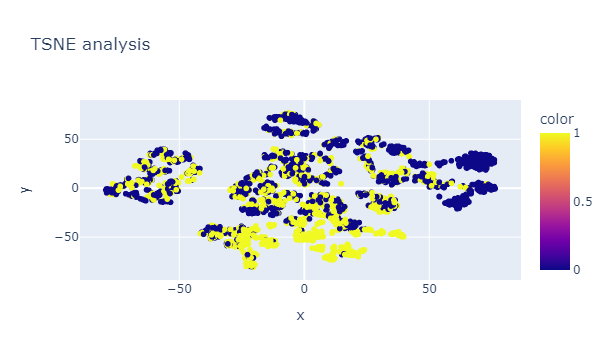

In [22]:
tsn = TSNE(n_components=2, perplexity=25, random_state=0).fit(x_s, y)
t_x = tsn.fit_transform(x_s)
fig = px.scatter(x=t_x[:, 0], y=t_x[:, 1], color=y.values.ravel(), title="TSNE analysis")
fig.show()

In [59]:
t_x = pd.DataFrame(t_x, columns=[f"{str(i+1)}principal" for i in range(t_x.shape[1])])
x_pca = pd.merge(x_s, t_x.iloc[:, :2], how="outer", left_index=True, right_index=True)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, stratify=y, random_state=0, test_size=0.7)
pip = ModelPipline(model_type="classifier")
pip.predict(x_train, y_train, x_test, y_test)
x_pca.to_csv("./data/processed/train0906_tsne.csv", index=False)

/home/kooose/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[17:11:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-p

### 線形変換
---

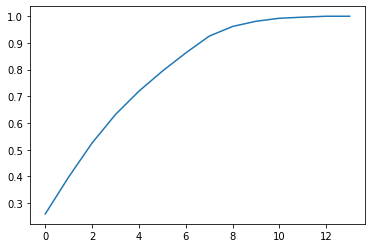

In [23]:
pca = PCA(random_state=0).fit(x_s)
plt.plot(pca.explained_variance_ratio_.cumsum()) # ６つほどの特長量で８０％以上を説明できる

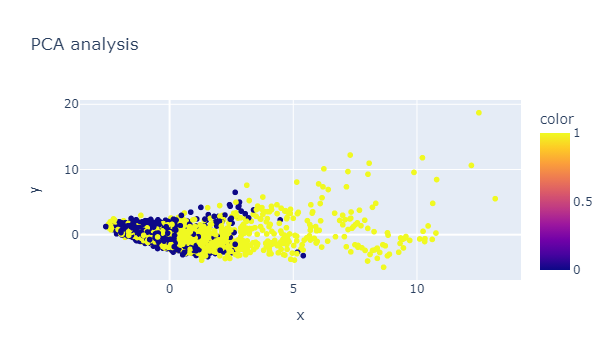

In [54]:
pca = PCA(n_components=6, random_state=0).fit(x_s)
x_pca = pca.fit_transform(x_s)
fig = px.scatter(x=x_pca[:, 0], y=x_pca[:, 1], color=y.values.ravel(), title="PCA analysis")
fig.show()

In [56]:
x_pca = pd.DataFrame(x_pca, columns=[f"{str(i+1)}principal" for i in range(x_pca.shape[1])])
x_pca.head()

,1principal,2principal,3principal,4principal,5principal,6principal
0,-0.106899,-0.212580,0.468596,-0.279415,0.209764,-0.032794
1,-1.138583,-0.271657,0.624181,0.700381,-0.967201,-0.635119
2,-1.228114,-0.353209,-0.314976,0.950574,-0.085974,0.782939
3,-1.046136,-0.091949,0.744673,0.645905,-0.980438,-0.587839
4,0.715275,0.830216,1.857027,0.954849,-0.991017,-0.442901


In [53]:
sample = pd.merge(x_pca, y, how="outer", left_index=True, right_index=True)
sample.loc[sample["1principal"] < 0, "disease"].value_counts() / sample.shape[0]

0    0.284000
1    0.223143
Name: disease, dtype: float64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, stratify=y, random_state=0, test_size=0.7)
pip = ModelPipline(model_type="classifier")
pip.predict(x_train, y_train, x_test, y_test)

/home/kooose/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[16:43:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/kooose/.local/lib/python3.8/site-packages/sklearn/pipeline.py:346: DataConversionWarning:

A column-vector y was passed

In [58]:
x_pca = pd.merge(x_s, x_pca.iloc[:, :2], how="outer", left_index=True, right_index=True)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, stratify=y, random_state=0, test_size=0.7)
pip = ModelPipline(model_type="classifier")
x_pca.to_csv("./data/processed/train0906_pca.csv", index=False)
pip.predict(x_train, y_train, x_test, y_test)

/home/kooose/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[17:11:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-p

---  
検証結果: 次元削減を特長量に加えてもスコアに変化なし  
  
---  